In [16]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [18]:
# Load dataset
df = pd.read_csv("tic-tac-toe.csv")

In [20]:
# Encode board positions
X = df.drop('class', axis=1).apply(LabelEncoder().fit_transform)

In [22]:
# True labels (converted to int)
y_true = df['class'].astype(int)

In [24]:
# Hierarchical Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=2)
y_pred = model.fit_predict(X)

In [26]:
# Count clusters
print("Cluster counts:")
print(pd.Series(y_pred).value_counts())

Cluster counts:
0    772
1    186
Name: count, dtype: int64


In [28]:
# Print results
cluster_counts = pd.Series(clusters).value_counts()
print("Cluster Counts:")
print(cluster_counts)
print(f"\nAdjusted Rand Index (ARI): {ari_score:.4f}")

Cluster Counts:
0    772
1    186
Name: count, dtype: int64

Adjusted Rand Index (ARI): -0.0131


In [30]:

# Compare prediction to true class
ari = adjusted_rand_score(y_true, y_pred)
print(f"\nAdjusted Rand Index (cluster vs. actual class): {ari:.4f}")


Adjusted Rand Index (cluster vs. actual class): -0.0131


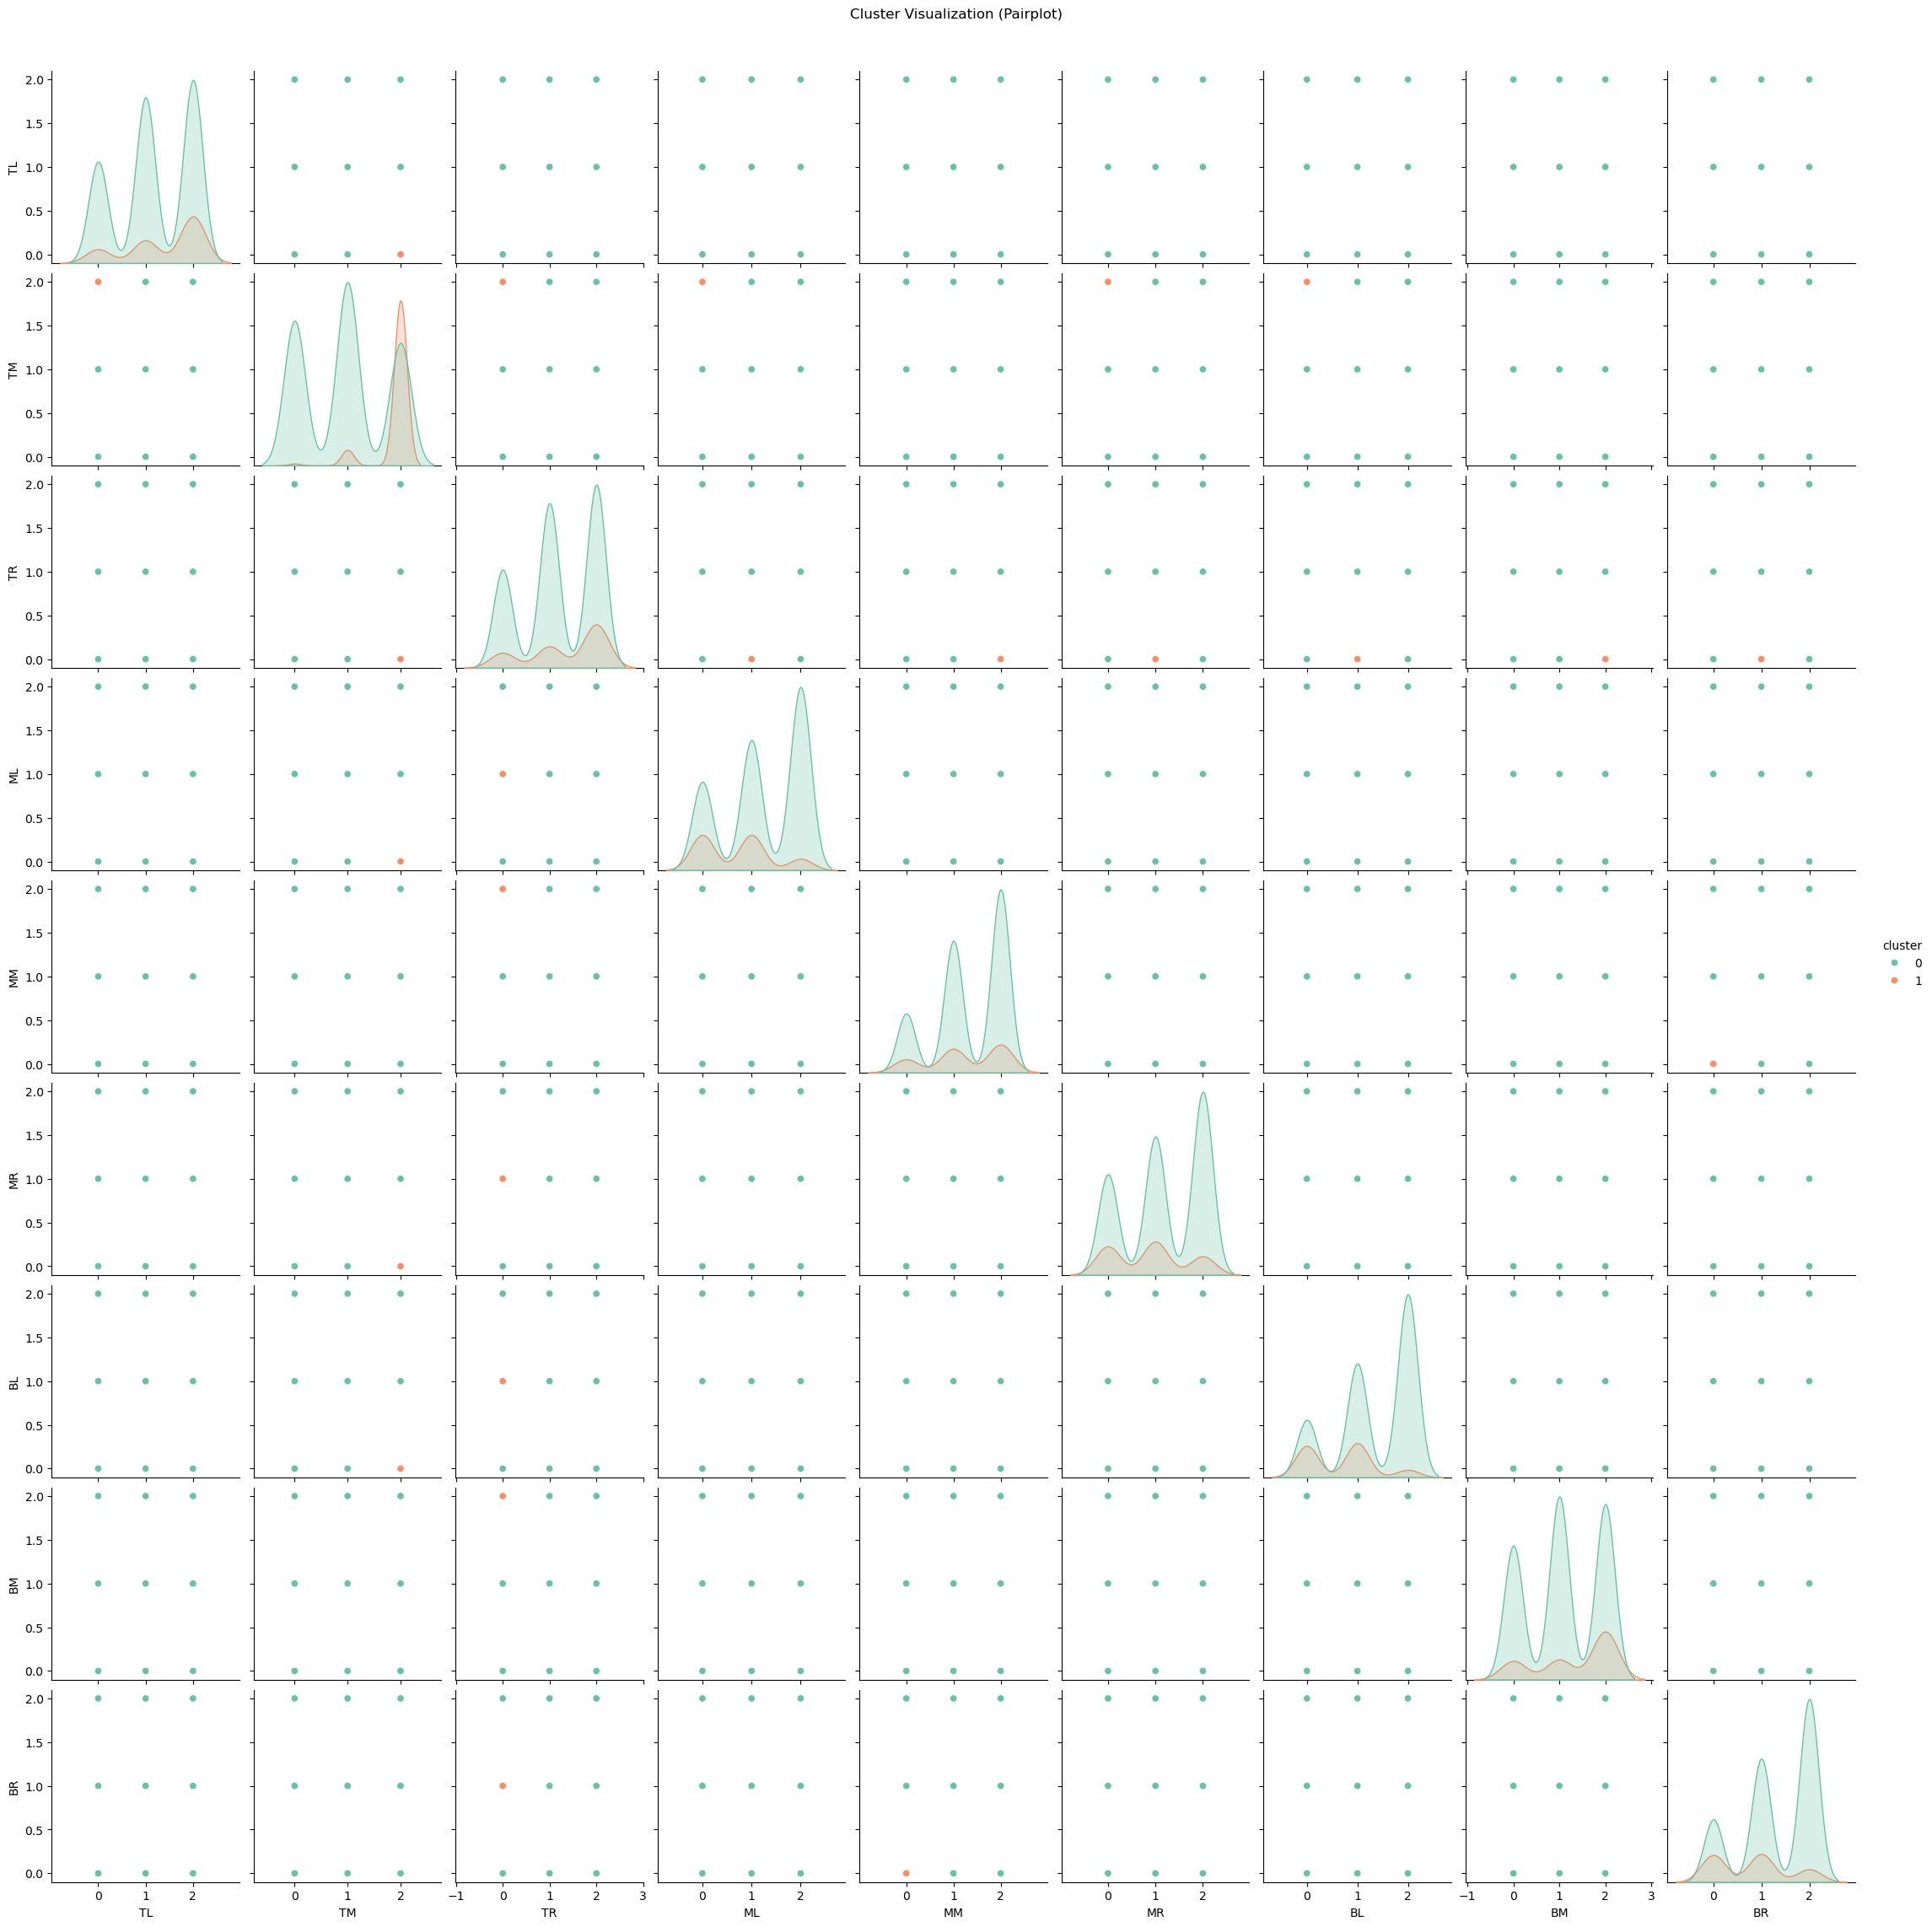

In [32]:
# Visualize using pairplot (2D sample)
sns.pairplot(pd.DataFrame(X, columns=df.columns[:-1]).assign(cluster=y_pred), hue='cluster', palette='Set2')
plt.suptitle('Cluster Visualization (Pairplot)', y=1.02)
plt.show()

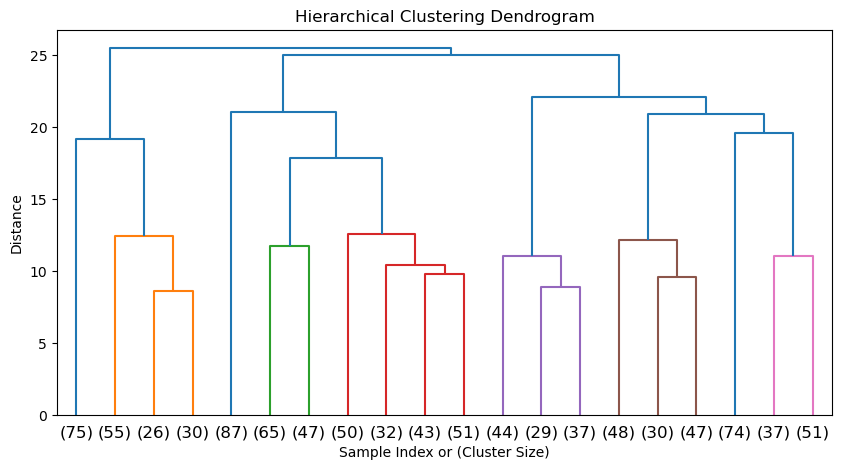

In [34]:
# Dendrogram
linked = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linked, truncate_mode='lastp', p=20, show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()